In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [11]:
ne = ['ME', 'NH', 'MA', 'RI', 'CT']
south_atl = ['NC', 'SC', 'GA', 'FL']
mid_atl = ['MD', 'VA', 'NJ', 'NY', 'NJ', 'DE']
gulf = ['TX', 'LA', 'MS', 'AL']
ak = ['AK']
nw = ['OR', 'WA']
cal = ['CA']
combo = ['ME', 'NH', 'MA', 'RI', 'CT', 'NJ', 'NY', 'DE', 'MD', 'VA', 'NC', 'SC', 'GA', 'TX', 'LA', 'MS',
         'AL', 'FL']

ne_set = set(ne)
mid_atl_set = set(mid_atl)
south_atl_set = set(south_atl)
gulf_set = set(gulf)
ak_set = set(ak)
nw_set = set(nw)
cal_set = set(cal)
combo_set = set(combo)
#FL is considered South Atlantic, not Gulf

In [12]:
def assign_region(row):
    if(row['State'] in gulf_set):
        return 0
    elif(row['State'] in south_atl_set):
        return 1
    elif(row['State'] in mid_atl_set):
        return 2
    elif(row['State'] in ne_set):
        return 3
    elif(row['State'] in ak_set):
        return 4
    elif(row['State'] in nw_set):
        return 5
    elif(row['State'] in cal_set):
        return 6 #norcal
    else:
        return 7 #socal

In [13]:
df = pd.read_csv('data/processed/landings_processed.csv')
df['region'] = df.apply(lambda x: assign_region(x), axis=1)
print(len(df.index))
df.head()
df_gulf = df[df['State'].isin(gulf_set)]
df_south_atl = df[df['State'].isin(south_atl_set)]
df_mid_atl = df[df['State'].isin(mid_atl_set)]
df_ne = df[df['State'].isin(ne_set)

3530


,Year,Port,Millions of Pounds,State,region
0,2017,"Dutch Harbor, AK",768.7,AK,4
1,2017,"Aleutian Islands (Other), AK",552.3,AK,4
2,2017,"Kodiak, AK",530.4,AK,4
3,2017,"Reedville, VA",319.9,VA,2
4,2017,"Pascagoula-Moss Point, MS",301.3,MS,0


In [24]:
gulf_temp = pd.read_csv('data/temp/avg_yearly_gulf.csv')
south_atl_temp = pd.read_csv('data/temp/avg_yearly_south_atl.csv')
mid_atl_temp = pd.read_csv('data/temp/avg_yearly_mid_atl.csv')
ne_temp = pd.read_csv('data/temp/avg_yearly_ne.csv')
ak_temp = pd.read_csv('data/temp/avg_yearly_ak.csv')
nw_temp = pd.read_csv('data/temp/avg_yearly_nw.csv')

In [25]:
def apply_temp_values(row):
    if(row['region'] == 0):
        return gulf_temp['avg_yearly_temp'][row['Year'] - 1980]
    elif(row['region'] == 1):
        return south_atl_temp['avg_yearly_temp'][row['Year'] - 1980]
    elif(row['region'] == 2):
        return mid_atl_temp['avg_yearly_temp'][row['Year'] - 1980]
    elif(row['region'] == 3):
        return ne_temp['avg_yearly_temp'][row['Year'] - 1980]
    elif(row['region'] == 4):
        return ak_temp['avg_yearly_temp'][row['Year'] - 1980]
    else:
        return math.nan

In [27]:
df['Temp'] = df.apply(lambda x: apply_temp_values(x), axis=1)
df = df.dropna()
df.head()

2567

In [28]:
#df = df.drop(columns=['Port_ID'])
df = df.assign(id=(df['Port']).astype('category').cat.codes)
df.columns = ['Year', 'Port', 'Yield', 'State', 'Region', 'Temp', 'Port_ID']
df.head()

,Year,Port,Yield,State,Region,Temp,Port_ID
0,2017,"Dutch Harbor, AK",768.7,AK,4,6.779404,38
1,2017,"Aleutian Islands (Other), AK",552.3,AK,4,6.779404,3
2,2017,"Kodiak, AK",530.4,AK,4,6.779404,71
3,2017,"Reedville, VA",319.9,VA,2,16.670358,107
4,2017,"Pascagoula-Moss Point, MS",301.3,MS,0,26.016623,92


In [29]:
df_gulf = df[df['Region'] == 0]
df_gulf = df_gulf.sort_values(['Port_ID'])
df_gulf = df_gulf.sort_values(['Port_ID', 'Temp'],ascending=True)

C:\Users\acaso\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()


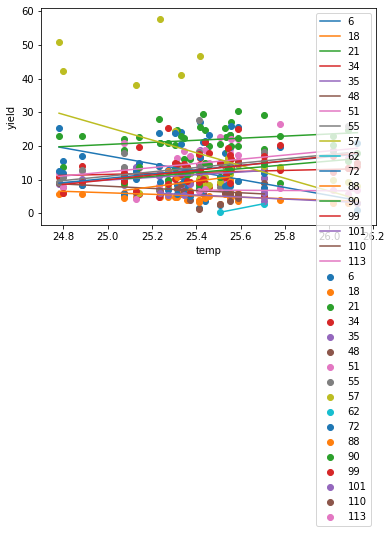

In [62]:
df_gulf.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()

port_ids_gulf = set(df_gulf['Port_ID'].values)
port_ids_gulf -= {11, 92, 54, 23, 63, 118, 65, 41, 37, 77}

for port_id in port_ids_gulf:
    z = np.polyfit(x=df_gulf[df_gulf['Port_ID'] == port_id]['Temp'], y=df_gulf[df_gulf['Port_ID'] == port_id]['Yield'], deg=1)
    p = np.poly1d(z)
    trend_line = p(df_gulf[df_gulf['Port_ID'] == port_id]['Temp'])
    ax.plot(df_gulf[df_gulf['Port_ID'] == port_id]['Temp'], trend_line, label=port_id)
    ax.scatter(df_gulf[df_gulf['Port_ID'] == port_id]['Temp'],df_gulf[df_gulf['Port_ID'] == port_id]['Yield'],label=port_id)

ax.set_xlabel("temp")
ax.set_ylabel("yield")

plt.legend(loc='best')
plt.show()

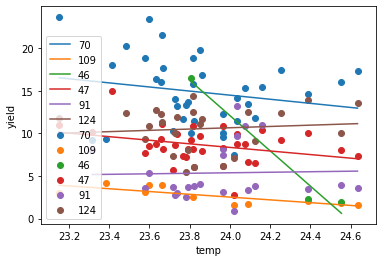

In [53]:
df_south_atl = df[df['Region'] == 1]
df_south_atl = df_south_atl.sort_values(['Port_ID'])
df_south_atl = df_south_atl.sort_values(['Port_ID', 'Temp'],ascending=True)
df_south_atl.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()

port_ids_sa = set(df_south_atl['Port_ID'].values)

for port_id in port_ids_sa:
    z = np.polyfit(x=df_south_atl[df_south_atl['Port_ID'] == port_id]['Temp'], y=df_south_atl[df_south_atl['Port_ID'] == port_id]['Yield'], deg=1)
    p = np.poly1d(z)
    trend_line = p(df_south_atl[df_south_atl['Port_ID'] == port_id]['Temp'])
    ax.plot(df_south_atl[df_south_atl['Port_ID'] == port_id]['Temp'], trend_line, label=port_id)
    ax.scatter(df_south_atl[df_south_atl['Port_ID'] == port_id]['Temp'],df_south_atl[df_south_atl['Port_ID'] == port_id]['Yield'],label=port_id)
    
ax.set_xlabel("temp")
ax.set_ylabel("yield")

plt.legend(loc='best')
plt.show()

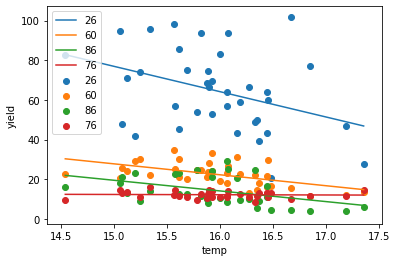

In [52]:
df_mid_atl = df[df['Region'] == 2]
df_mid_atl = df_mid_atl.sort_values(['Port_ID'])
df_mid_atl = df_mid_atl.sort_values(['Port_ID', 'Temp'],ascending=True)
df_mid_atl.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()

port_ids_ma = set(df_mid_atl['Port_ID'].values)

for port_id in port_ids_ma:
    z = np.polyfit(x=df_mid_atl[df_mid_atl['Port_ID'] == port_id]['Temp'], y=df_mid_atl[df_mid_atl['Port_ID'] == port_id]['Yield'], deg=1)
    p = np.poly1d(z)
    trend_line = p(df_mid_atl[df_mid_atl['Port_ID'] == port_id]['Temp'])
    ax.plot(df_mid_atl[df_mid_atl['Port_ID'] == port_id]['Temp'], trend_line, label=port_id)
    ax.scatter(df_mid_atl[df_mid_atl['Port_ID'] == port_id]['Temp'],df_mid_atl[df_mid_atl['Port_ID'] == port_id]['Yield'],label=port_id)

ax.set_xlabel("temp")
ax.set_ylabel("yield")

plt.legend(loc='best')
plt.show()

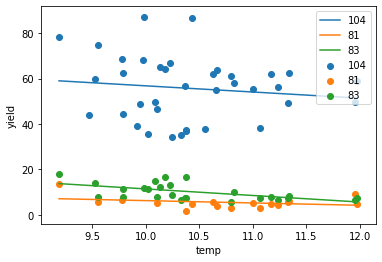

In [46]:
df_ne = df[df['Region'] == 3]
df_ne = df_ne.sort_values(['Port_ID'])
df_ne = df_ne.sort_values(['Port_ID', 'Temp'],ascending=True)
df_ne.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()

port_ids_ne = set(df_ne['Port_ID'].values)

for port_id in port_ids_ne:
    z = np.polyfit(x=df_ne[df_ne['Port_ID'] == port_id]['Temp'], y=df_ne[df_ne['Port_ID'] == port_id]['Yield'], deg=1)
    p = np.poly1d(z)
    trend_line = p(df_ne[df_ne['Port_ID'] == port_id]['Temp'])
    ax.plot(df_ne[df_ne['Port_ID'] == port_id]['Temp'], trend_line, label=port_id)
    ax.scatter(df_ne[df_ne['Port_ID'] == port_id]['Temp'],df_ne[df_ne['Port_ID'] == port_id]['Yield'],label=port_id)

ax.set_xlabel("temp")
ax.set_ylabel("yield")

plt.legend(loc='best')
plt.show()

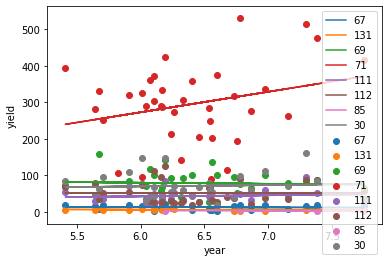

In [49]:
df_AK = df[df['Region'] == 4]
df_AK = df_AK.sort_values(['Port_ID', 'Year'],ascending=True)
df_AK.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()

port_ids_AK = set(df_AK['Port_ID'].values)

for port_id in port_ids_AK:
    z = np.polyfit(x=df_AK[df_AK['Port_ID'] == port_id]['Temp'], y=df_AK[df_AK['Port_ID'] == port_id]['Yield'], deg=1)
    p = np.poly1d(z)
    trend_line = p(df_AK[df_AK['Port_ID'] == port_id]['Temp'])
    ax.plot(df_AK[df_AK['Port_ID'] == port_id]['Temp'], trend_line, label=port_id)
    ax.scatter(df_AK[df_AK['Port_ID'] == port_id]['Temp'],df_AK[df_AK['Port_ID'] == port_id]['Yield'],label=port_id)

ax.set_xlabel("year")
ax.set_ylabel("yield")

plt.legend(loc='best')
plt.show()

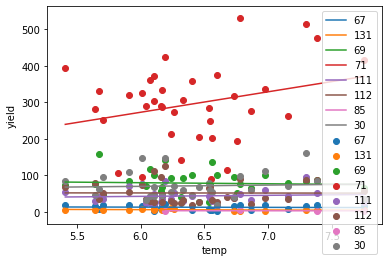

In [63]:
df_ak = df[df['Region'] == 4]
df_ak = df_ak.sort_values(['Port_ID'])
df_ak = df_ak.sort_values(['Port_ID', 'Temp'],ascending=True)
df_ak.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()

port_ids_ak = set(df_ak['Port_ID'].values)

for port_id in port_ids_ak:
    z = np.polyfit(x=df_ak[df_ak['Port_ID'] == port_id]['Temp'], y=df_ak[df_ak['Port_ID'] == port_id]['Yield'], deg=1)
    p = np.poly1d(z)
    trend_line = p(df_ak[df_ak['Port_ID'] == port_id]['Temp'])
    ax.plot(df_ak[df_ak['Port_ID'] == port_id]['Temp'], trend_line, label=port_id)
    ax.scatter(df_ak[df_ak['Port_ID'] == port_id]['Temp'],df_ak[df_ak['Port_ID'] == port_id]['Yield'],label=port_id)

ax.set_xlabel("temp")
ax.set_ylabel("yield")

plt.legend(loc='best')
plt.show()

In [15]:
#long string ahead!
port_names = ['Brownsville-Port Isabel, TX','Cape May-Wildwood, NJ','Coos Bay-Charleston, OR','Cordova, AK','Crescent City, CA','Fernandina Beach, FL','Fort Myers, FL','Galveston, TX','Grand Isle, LA','Hampton Roads Area, VA','Honolulu, HI','Juneau, AK','Ketchikan, AK','Key West, FL','Kodiak, AK','Los Angeles, CA','Montauk, NY','Monterey, CA','Neah Bay, WA','New London, CT','Newport, RI','Norton/Kotzebue Sound, AK','Ocean City, MD','Panama City, FL','Portland, ME','San Diego, CA','San Francisco Area, CA','Santa Barbara, CA','Savannah, GA','Seattle, WA','Seward, AK','Sitka, AK','Tampa Bay-St. Petersburg, FL','Willapa Bay, WA','Yakutat, AK']
port_names_set = set(port_names)

In [17]:
df = df[df['Port'].isin(port_names_set)]
df = df.assign(id=(df['Port']).astype('category').cat.codes)
df.columns = ['Year', 'Port', 'Yield', 'State', 'Region', 'Port_ID']
df.head()

,Year,Port,Yield,State,Region,Port_ID
2,2017,"Kodiak, AK",530.4,AK,4,14
13,2017,"Cape May-Wildwood, NJ",101.6,NJ,2,1
14,2017,"Cordova, AK",99.2,AK,4,3
15,2017,"Sitka, AK",91.3,AK,4,31
17,2017,"Ketchikan, AK",77.0,AK,4,12


In [45]:
df = df.sort_values(['Port_ID', 'Year'], ascending=True)
df.to_csv('data/processed/filtered_ports.csv', index=False)

,Year,Port,Yield,State,Region,Temp,Port_ID
0,1984,"Brownsville-Port Isabel, TX",23.0,TX,0,24.780108,21
1,1988,"Brownsville-Port Isabel, TX",13.8,TX,0,24.795727,21
2,1992,"Brownsville-Port Isabel, TX",22.9,TX,0,24.885390,21
3,1996,"Brownsville-Port Isabel, TX",22.0,TX,0,25.072741,21
4,1993,"Brownsville-Port Isabel, TX",18.9,TX,0,25.073331,21
5,1987,"Brownsville-Port Isabel, TX",13.4,TX,0,25.129428,21
6,2010,"Brownsville-Port Isabel, TX",22.7,TX,0,25.141673,21
7,1981,"Brownsville-Port Isabel, TX",28.0,TX,0,25.232235,21
8,1983,"Brownsville-Port Isabel, TX",21.0,TX,0,25.234284,21
9,1994,"Brownsville-Port Isabel, TX",21.0,TX,0,25.270949,21
